In [1]:
# importing all necessary libraries to run the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
# using the variable sw to hold all stopwords that are in English
sw = stopwords.words('english')

In [2]:
data = pd.read_csv("playstore.csv") 


In [3]:
data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [17]:
data.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [5]:
print('Size before removing Nan: %s'% len(data))
data.dropna(axis=0, inplace=True)
print('Size before removing Nan: %s'% len(data))

Size before removing Nan: 64295
Size before removing Nan: 37427


In [6]:
data=data.reset_index(drop=True)

In [7]:
import string as str
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,len(data)):
    review = re.sub('[^a-zA-Z]', ' ',data['Translated_Review'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',data['Translated_Review'][i])
    review = re.sub('[^0-9a-zA-Z #+_♥️]', ' ',data['Translated_Review'][i])#Remove bad symbols
    review = re.sub(r'\d+', '',review)
    review = review.lower()
    review = review.split()

    review = [token for token in review if token not in sw]
    review=' '.join(review)
    corpus.append(review)
corpus

['like eat delicious food cooking food case best foods helps lot also best shelf life',
 'help eating healthy exercise regular basis',
 'works great especially going grocery store',
 'best idea us',
 'best way',
 'amazing',
 'looking forward app',
 'helpful site help foods get',
 'good',
 'useful information amount spelling errors questions validity information shared fixed stars given',
 'thank great app add arthritis eyes immunity kidney liver detox foods please',
 'greatest ever completely awesome maintain health must ppl love',
 'good health good health first priority',
 'health important world either life think',
 'mrs sunita bhati thankful developers make kind app really good healthy food body',
 'useful diabetes age need control sugar thanks',
 'one greatest apps',
 'good nice',
 'healthy really helped',
 'god health',
 'health always top priority mysg',
 'excellent useful',
 'found lot wealth form health',
 'found important',
 'healthy eating',
 'good simply good',
 'test',
 'g

In [9]:
X=corpus
X_train, X_test, y_train, y_test = train_test_split(X,data.Sentiment, test_size=0.3)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,1))
X_train= vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=100,criterion='gini',n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
#gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.3,random_state=2)
#clf= LogisticRegression()
#gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
#predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#svc = svm.SVC(kernel='linear', C=1,gamma='auto')
#predsETC = svc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
#print(accuracy_score(y_test, predsGB))
#print(classification_report(y_test, predsGB))
#print(accuracy_score(y_test, predsLR))
#print(classification_report(y_test, predsLR))
#print(accuracy_score(y_test, predsETC))
#print(classification_report(y_test, predsETC))
#print(accuracy_score(y_test, preds))

0.8987443227357734
              precision    recall  f1-score   support

    Negative       0.95      0.70      0.81      2451
     Neutral       0.85      0.87      0.86      1533
    Positive       0.90      0.97      0.93      7245

    accuracy                           0.90     11229
   macro avg       0.90      0.85      0.87     11229
weighted avg       0.90      0.90      0.90     11229



In [13]:
rfc = RandomForestClassifier(n_estimators=100,criterion='entropy',n_jobs=-1,random_state=2)
rfcGini = RandomForestClassifier(n_estimators=100,criterion='gini',n_jobs=-1,random_state=2)
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('gini',rfcGini), ('entropy',rfc)], voting='hard',weights=[1,1])
finalpred=model.fit(X_train,y_train).predict(X_test)
print(accuracy_score(y_test, finalpred))
print(classification_report(y_test, finalpred))

0.9034642443672634
              precision    recall  f1-score   support

    Negative       0.94      0.72      0.82      2451
     Neutral       0.85      0.89      0.87      1533
    Positive       0.91      0.97      0.94      7245

    accuracy                           0.90     11229
   macro avg       0.90      0.86      0.87     11229
weighted avg       0.91      0.90      0.90     11229



In [37]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
rfc = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=2)
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.3,random_state=2)
clf= LogisticRegression()
gnb = BernoulliNB()
preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
svc = svm.SVC(kernel='linear', C=1,gamma='auto')
predsETC = svc.fit(X_train, y_train).predict(X_test)
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))
print(accuracy_score(y_test, predsGB))
print(classification_report(y_test, predsGB))
print(accuracy_score(y_test, predsLR))
print(classification_report(y_test, predsLR))
print(accuracy_score(y_test, predsETC))
print(classification_report(y_test, predsETC))
print(accuracy_score(y_test, preds))

0.7380888770148722
             precision    recall  f1-score   support

   Negative       0.78      0.48      0.59      2492
    Neutral       0.56      0.28      0.38      1581
   Positive       0.75      0.93      0.83      7156

avg / total       0.73      0.74      0.71     11229

0.6689820999198504
             precision    recall  f1-score   support

   Negative       0.78      0.17      0.28      2492
    Neutral       0.53      0.04      0.08      1581
   Positive       0.66      0.98      0.79      7156

avg / total       0.67      0.67      0.58     11229

0.6848339121916466
             precision    recall  f1-score   support

   Negative       0.89      0.21      0.34      2492
    Neutral       0.92      0.03      0.06      1581
   Positive       0.67      0.99      0.80      7156

avg / total       0.76      0.68      0.60     11229

0.7598183275447502
             precision    recall  f1-score   support

   Negative       0.85      0.49      0.62      2492
    Neutral  

In [33]:
# This CountVectorizer is used to represent the words as a list of values, instead of text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(X)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)
#rfc = RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=2)
#etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=2)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.3,random_state=2)
#clf= LogisticRegression()
#gnb = BernoulliNB()
#preds = rfc.fit(X_train, y_train).predict(X_test)
predsGB = gb.fit(X_train, y_train).predict(X_test)
#predsLR = clf.fit(X_train, y_train).predict(X_test)
#predsGNB = gnb.fit(X_train, y_train).predict(X_test)
#svc = svm.SVC(kernel='linear', C=1,gamma='auto')
#predsETC = svc.fit(X_train, y_train).predict(X_test)
#print(accuracy_score(y_test, preds))
#print(classification_report(y_test, preds))
print(accuracy_score(y_test, predsGB))
print(classification_report(y_test, predsGB))
#print(accuracy_score(y_test, predsLR))
#print(classification_report(y_test, predsLR))
#print(accuracy_score(y_test, predsETC))
#print(classification_report(y_test, predsETC))
#print(accuracy_score(y_test, preds))

0.8831596758393445
             precision    recall  f1-score   support

   Negative       0.89      0.69      0.78      2482
    Neutral       0.75      0.92      0.83      1558
   Positive       0.91      0.94      0.93      7189

avg / total       0.89      0.88      0.88     11229



In [87]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=3, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, 
          epochs=2, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy:", scores[1])

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [6]:
Data = data.dropna()
Data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [7]:
Data['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

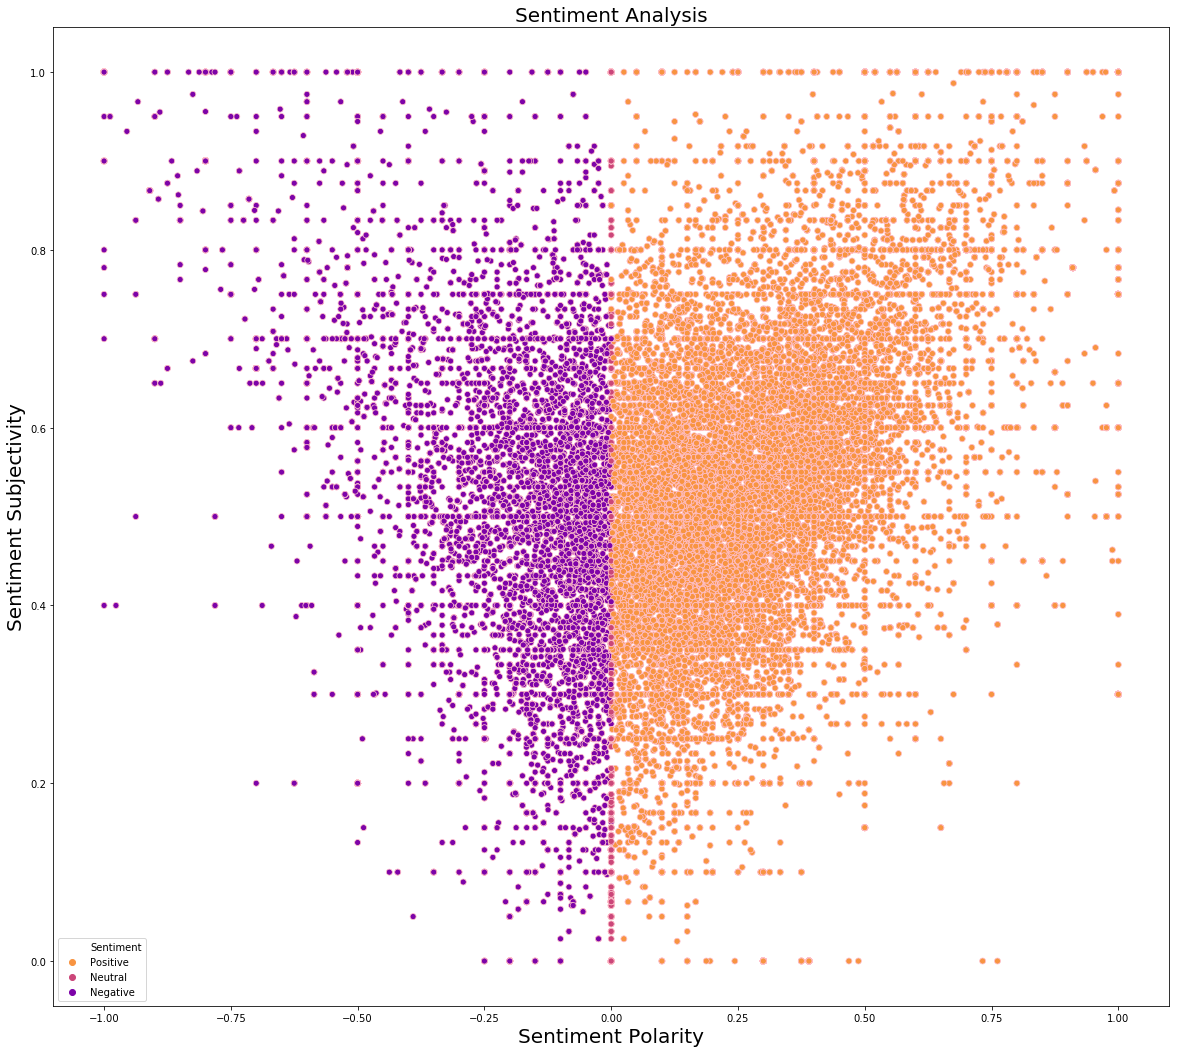

In [9]:
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
j = sns.scatterplot(Data['Sentiment_Polarity'],Data['Sentiment_Subjectivity'],hue=Data['Sentiment'], edgecolor='pink',palette="plasma_r")
plt.xlabel('Sentiment Polarity', fontsize=20)
plt.ylabel('Sentiment Subjectivity', fontsize=20)
plt.title("Sentiment Analysis", fontsize=20)
plt.show()


In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [13]:
Data["index"] = range(0,37427)
Data = Data.set_index("index")
Data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
index,,,,,
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
3,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
4,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [15]:
STOPWORDS = set(stopwords.words('english'))
corpus=[]
for i in range(0,37427):
    review = re.sub('[^a-zA-Z]', ' ',Data['Translated_Review'][i])
    review = re.sub('[/(){}\[\]\|@!,;]', ' ',Data['Translated_Review'][i])
    review = re.sub('[^0-9a-z #+_♥️]', ' ',Data['Translated_Review'][i])#Remove bad symbols
    review = review.lower()
    review = review.split()
    stemmer = PorterStemmer()
    review = [stemmer.stem(token) for token in review if token not in STOPWORDS]
    review=' '.join(review)
    corpus.append(review)
corpus

['like eat delici food hat cook food case 10 est ood help lot also est efor helf ife',
 'help eat healthi exercis regular basi',
 'ork great especi go groceri store',
 'est idea us',
 'est way',
 'maze',
 'ook forward app',
 'help site help food get',
 'good',
 'seful inform amount spell error question valid inform share nce fix 5 star given',
 'hank reat app dd arthriti eye immun kidney liver detox food pleas',
 'reatest ever omplet awesom maintain health must ppl ove',
 'ood health ood health first prioriti',
 'ealth import world either life think',
 'rs sunita bhati thank develop make kind app realli good healthi food bodi',
 'eri seful diabet age 30 need control sugar thank',
 'ne greatest app',
 'good nice',
 'ealthi ealli help',
 'od health',
 '5',
 'n excel use',
 'found lot wealth form health',
 'ecaus found import',
 'ealthi ate',
 'eri good impli good',
 'n test',
 'ood',
 'hank advic ownload dobe reader still get recip book',
 'recip book nabl recip book',
 'bsolut abul heno

In [17]:
words = []
Sentiment_Polarity=[]
for i in range(0,len(corpus)):
    words = words + (re.findall(r'\w+', corpus[i]))# words cantain all the words in the dataset
    Sentiment_Polarity.append
words

KeyboardInterrupt: 

In [19]:
from collections import Counter
words_counts = Counter(words)

In [21]:
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)
most_commmom_wordList = []
most_commmom_CountList = []
for x, y in most_common_words:
    most_commmom_wordList.append(x)
    most_commmom_CountList.append(y)

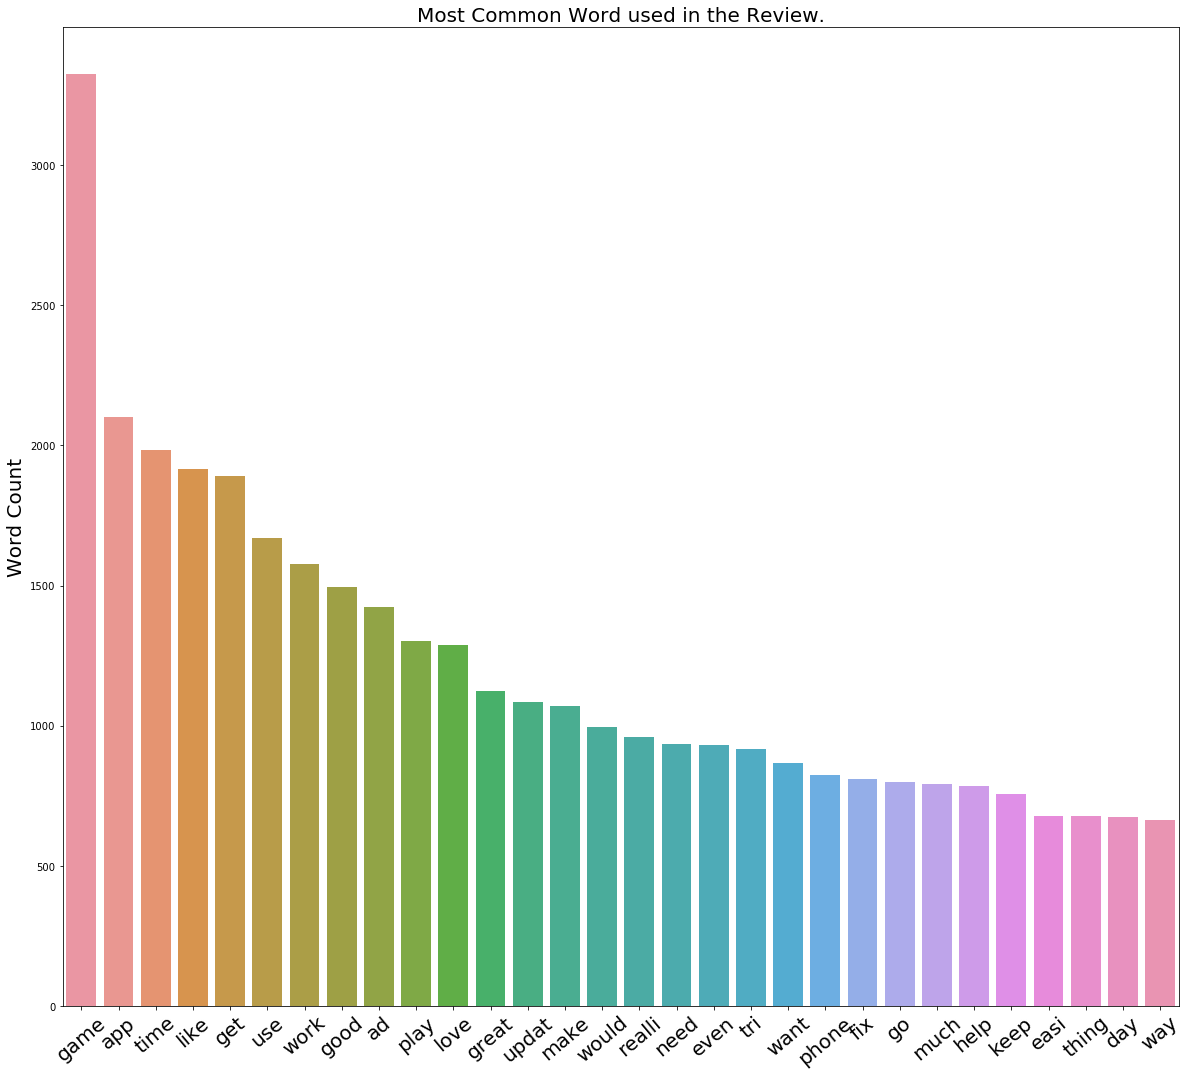

In [22]:
plt.figure(figsize=(20,18))
plot = sns.barplot(np.arange(30), most_commmom_CountList[0:30]) #width=0.35)
plt.ylabel('Word Count',fontsize=20)
plt.xticks(np.arange(30), most_commmom_wordList[0:30], fontsize=20, rotation=40)
plt.title('Most Common Word used in the Review.', fontsize=20)
plt.show()